In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from datetime import *
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.svm import *
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from xgboost.sklearn import XGBRFClassifier, DMatrix, train
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [49]:
df_training = pd.read_csv('../datasets/training_data.csv')
df_training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,c�u claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,c�u claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


# $\textbf{Visualização de dados}$

In [50]:
df_training.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [51]:
df_training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,c�u claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,c�u claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [52]:
df_training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [53]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

### $\textbf{Missing values}$

In [54]:
#Percentagem de missing values
print(df_training.isna().sum()*100/len(df_training))

city_name                   0.000000
record_date                 0.000000
AVERAGE_SPEED_DIFF          0.000000
AVERAGE_FREE_FLOW_SPEED     0.000000
AVERAGE_TIME_DIFF           0.000000
AVERAGE_FREE_FLOW_TIME      0.000000
LUMINOSITY                  0.000000
AVERAGE_TEMPERATURE         0.000000
AVERAGE_ATMOSP_PRESSURE     0.000000
AVERAGE_HUMIDITY            0.000000
AVERAGE_WIND_SPEED          0.000000
AVERAGE_CLOUDINESS         39.371697
AVERAGE_PRECIPITATION       0.000000
AVERAGE_RAIN               91.735173
dtype: float64


### $\textbf{Unique values}$

In [55]:
cols = ['city_name', 'AVERAGE_SPEED_DIFF', 'LUMINOSITY', 'AVERAGE_CLOUDINESS', 'AVERAGE_RAIN']

for col in cols:
    print('coluna: ' + col + '\nvalores: ' + str(df_training[col].unique()) + '\n')

coluna: city_name
valores: ['Porto']

coluna: AVERAGE_SPEED_DIFF
valores: ['Medium' 'High' 'None' 'Low' 'Very_High']

coluna: LUMINOSITY
valores: ['LIGHT' 'LOW_LIGHT' 'DARK']

coluna: AVERAGE_CLOUDINESS
valores: [nan 'c�u claro' 'nuvens dispersas' 'c�u pouco nublado' 'c�u limpo'
 'algumas nuvens' 'nuvens quebrados' 'tempo nublado' 'nuvens quebradas'
 'nublado']

coluna: AVERAGE_RAIN
valores: [nan 'chuva fraca' 'chuva' 'chuva leve' 'chuvisco fraco' 'chuva moderada'
 'trovoada com chuva leve' 'aguaceiros' 'aguaceiros fracos'
 'chuva de intensidade pesada' 'trovoada com chuva'
 'chuva de intensidade pesado' 'chuva forte' 'chuvisco e chuva fraca']



### $\textbf{Remoção das features com missing values e/ou irrelevantes}$

In [56]:
df_training = df_training.drop(['city_name', 'AVERAGE_CLOUDINESS', 'AVERAGE_RAIN', 'AVERAGE_PRECIPITATION'], axis = 1)

### $\textbf{Distribuições}$

In [57]:
df_training_dist = df_training.copy()

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF', ylabel='Count'>

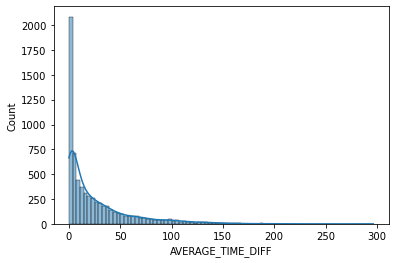

In [58]:
sns.histplot(df_training_dist['AVERAGE_TIME_DIFF'], kde=True)

<AxesSubplot:xlabel='AVERAGE_HUMIDITY', ylabel='Count'>

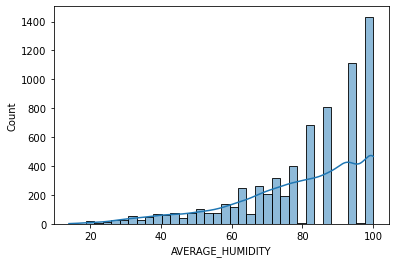

In [59]:
sns.histplot(df_training_dist['AVERAGE_HUMIDITY'], kde=True)

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE', ylabel='Count'>

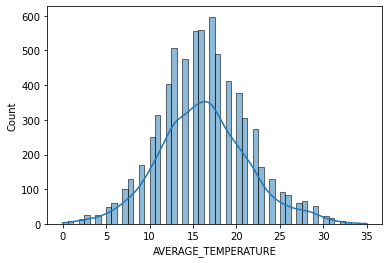

In [60]:
sns.histplot(df_training_dist['AVERAGE_TEMPERATURE'], kde=True)

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_SPEED', ylabel='Count'>

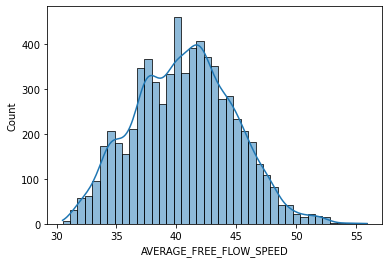

In [61]:
sns.histplot(df_training_dist['AVERAGE_FREE_FLOW_SPEED'], kde=True)

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_TIME', ylabel='Count'>

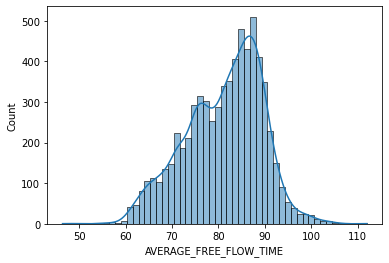

In [62]:
sns.histplot(df_training_dist['AVERAGE_FREE_FLOW_TIME'], kde=True)

<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE', ylabel='Count'>

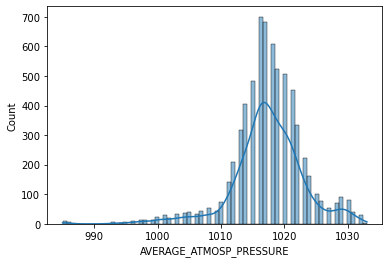

In [63]:
sns.histplot(df_training_dist['AVERAGE_ATMOSP_PRESSURE'], kde=True)

<AxesSubplot:xlabel='AVERAGE_WIND_SPEED', ylabel='Count'>

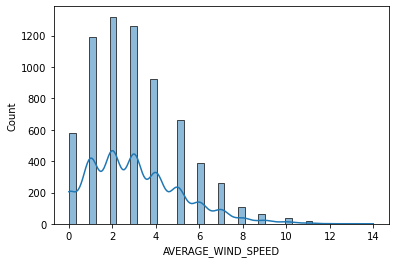

In [64]:
sns.histplot(df_training_dist['AVERAGE_WIND_SPEED'], kde=True)

### $\textbf{Deteção de outliers}$

In [65]:
df_training_outliers = df_training_dist.copy()

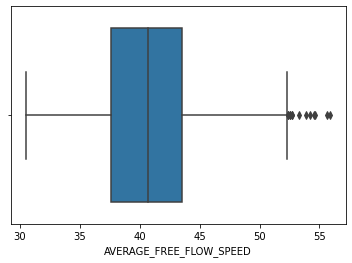

In [66]:
ax = sns.boxplot(x=df_training_outliers['AVERAGE_FREE_FLOW_SPEED'])

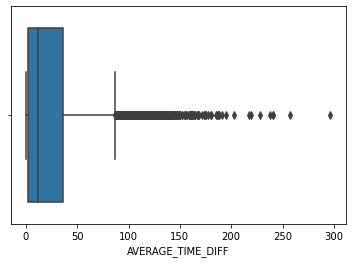

In [67]:
ax = sns.boxplot(x=df_training_outliers['AVERAGE_TIME_DIFF'])

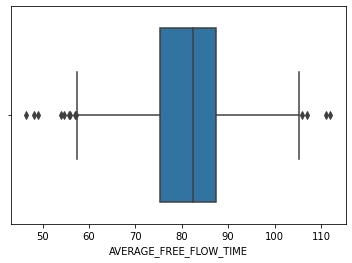

In [68]:
ax = sns.boxplot(x=df_training_outliers['AVERAGE_FREE_FLOW_TIME'])

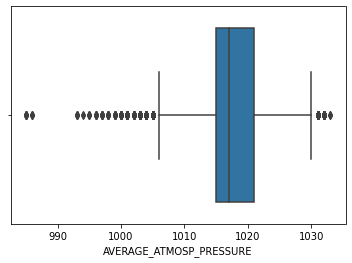

In [69]:
ax = sns.boxplot(x=df_training_outliers['AVERAGE_ATMOSP_PRESSURE'])

# $\textbf{Cálculo da velocidade}$

In [70]:
df_training_speed = df_training_outliers.copy()


for index, values in df_training_speed.iterrows():

    df_training_speed.loc[df_training_speed.index[index], 'AVERAGE_SPEED'] = values['AVERAGE_FREE_FLOW_SPEED'] - values['AVERAGE_FREE_FLOW_SPEED'] * values['AVERAGE_FREE_FLOW_TIME'] / (values['AVERAGE_FREE_FLOW_TIME'] + values['AVERAGE_TIME_DIFF'])

df_training_outliers = df_training_speed.copy()


# $\textbf{Preparação de dados e conversão de métricas}$

In [71]:
df_training_conversion = df_training_outliers.copy()

### $\textbf{Tratamento das datas}$

In [72]:
with open('EncontrosDesportivos.txt', 'r') as f:
    aux = f.readlines()
    datas = []
    
    for data in aux:
        pair = re.split(r' ', re.sub(r'\n', '', data))
        datas.append((pair[0], pair[1]))

    for index, values in df_training_conversion.iterrows():
        aux = values['record_date'].split()
        
        if (aux[0], aux[1]) in datas:
            df_training_conversion.loc[df_training_conversion.index[index], 'EVENT'] = 1
        else:
            df_training_conversion.loc[df_training_conversion.index[index], 'EVENT'] = 0


In [73]:
df_training_conversion['record_date'] = pd.to_datetime(df_training_conversion['record_date'])

df_training_conversion['DAY'] = df_training_conversion.record_date.dt.weekday
df_training_conversion['MONTH'] = df_training_conversion.record_date.dt.month
df_training_conversion['WEEK'] = df_training_conversion.record_date.dt.isocalendar().week
df_training_conversion['HOUR'] = df_training_conversion.record_date.dt.hour

df_training_conversion = df_training_conversion.drop(['record_date'], axis = 1)

In [74]:
def weekend(day):
    if day in range(5):
        return 0
    else:
        return 1
    
df_training_conversion['WEEKEND'] = df_training_conversion['DAY'].apply(weekend)
df_training_conversion.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_SPEED,EVENT,DAY,MONTH,WEEK,HOUR,WEEKEND
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,5.756936,0.0,3,8,35,7,0
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,14.842373,0.0,4,8,32,14,0
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,11.992233,0.0,6,9,35,16,1
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,14.709220,0.0,1,2,9,11,0
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,16.457143,0.0,3,6,23,12,0


### $\textbf{Speed Diff}$

In [75]:
def convertSpeed(speed):
    if speed == 'None':
        return 0
    elif speed == 'Low':
        return 1
    elif speed == 'Medium':
        return 2
    elif speed == 'High':
        return 3
    elif speed == 'Very_High':
        return 4

df_training_conversion['AVERAGE_SPEED_DIFF'] = df_training_conversion['AVERAGE_SPEED_DIFF'].apply(convertSpeed)
df_training_conversion['AVERAGE_SPEED_DIFF'].unique()

array([2, 3, 0, 1, 4])

### $\textbf{Luminosity}$

In [76]:
def convertLuminosity(lum):
    if lum == 'DARK':
        return 0
    elif lum == 'LOW_LIGHT':
        return 1
    elif lum == 'LIGHT':
        return 2

df_training_conversion['LUMINOSITY'] = df_training_conversion['LUMINOSITY'].apply(convertLuminosity)
df_training_conversion['LUMINOSITY'].unique()

array([2, 1, 0])

In [77]:
df_training_conversion.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_SPEED,EVENT,DAY,MONTH,WEEK,HOUR,WEEKEND
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,5.756936,0.0,3,8,35,7,0
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,14.842373,0.0,4,8,32,14,0
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,11.992233,0.0,6,9,35,16,1
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,14.709220,0.0,1,2,9,11,0
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,16.457143,0.0,3,6,23,12,0


# $\textbf{Análise das Features}$

In [78]:
df_training_features = df_training_conversion.copy()

df_training_features = df_training_features.drop_duplicates()

### $\textbf{Variância}$

In [79]:
print("Variancia: ")

print(df_training_features.var())

Variancia: 
AVERAGE_SPEED_DIFF            1.626845
AVERAGE_FREE_FLOW_SPEED      16.966349
AVERAGE_TIME_DIFF          1122.954048
AVERAGE_FREE_FLOW_TIME       68.797081
LUMINOSITY                    0.961058
AVERAGE_TEMPERATURE          26.661649
AVERAGE_ATMOSP_PRESSURE      33.074697
AVERAGE_HUMIDITY            332.656140
AVERAGE_WIND_SPEED            4.572842
AVERAGE_SPEED                56.242825
EVENT                         0.022099
DAY                           4.039718
MONTH                         8.688312
WEEK                        160.447044
HOUR                         48.156936
WEEKEND                       0.206882
dtype: float64


### $\textbf{Skewness}$

In [80]:
print("Skewness: ")

print(df_training_features.skew())

Skewness: 
AVERAGE_SPEED_DIFF         0.395661
AVERAGE_FREE_FLOW_SPEED    0.109731
AVERAGE_TIME_DIFF          2.042207
AVERAGE_FREE_FLOW_TIME    -0.365761
LUMINOSITY                -0.011740
AVERAGE_TEMPERATURE        0.181833
AVERAGE_ATMOSP_PRESSURE   -0.823360
AVERAGE_HUMIDITY          -0.966000
AVERAGE_WIND_SPEED         0.873479
AVERAGE_SPEED              1.082269
EVENT                      6.424568
DAY                       -0.021310
MONTH                     -0.473665
WEEK                      -0.474628
HOUR                      -0.006174
WEEKEND                    0.913646
dtype: float64


### $\textbf{Qui-Quadrado}$

In [81]:
cols = ['AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME',
        'AVERAGE_TEMPERATURE', 'LUMINOSITY', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
	    'AVERAGE_ATMOSP_PRESSURE', 'EVENT', 'DAY', 'MONTH', 'WEEK', 'HOUR', 'AVERAGE_SPEED']

def teste_chi2(table, c):
    stat, p, dof, expected = chi2_contingency(table)
    if p <= (1 - c):
        print("Sao dependentes (rejeita-se hipotese nula)")
    else:
        print("Sao independentes (não se rejeita hipotese nula)")
    return expected



for col in cols:
    print("\nTeste qui-quadrado para a coluna: " + col)
        
    valor = teste_chi2(pd.crosstab(df_training_features['AVERAGE_SPEED_DIFF'], df_training_features[col], margins=True), 0.95)


Teste qui-quadrado para a coluna: AVERAGE_FREE_FLOW_SPEED
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_TIME_DIFF
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_FREE_FLOW_TIME
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_TEMPERATURE
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: LUMINOSITY
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_HUMIDITY
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_WIND_SPEED
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: AVERAGE_ATMOSP_PRESSURE
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: EVENT
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: DAY
Sao dependentes (rejeita-se hipotese nula)

Teste qui-quadrado para a coluna: MONTH
Sao dependent

### $\textbf{Correlação}$

<AxesSubplot:>

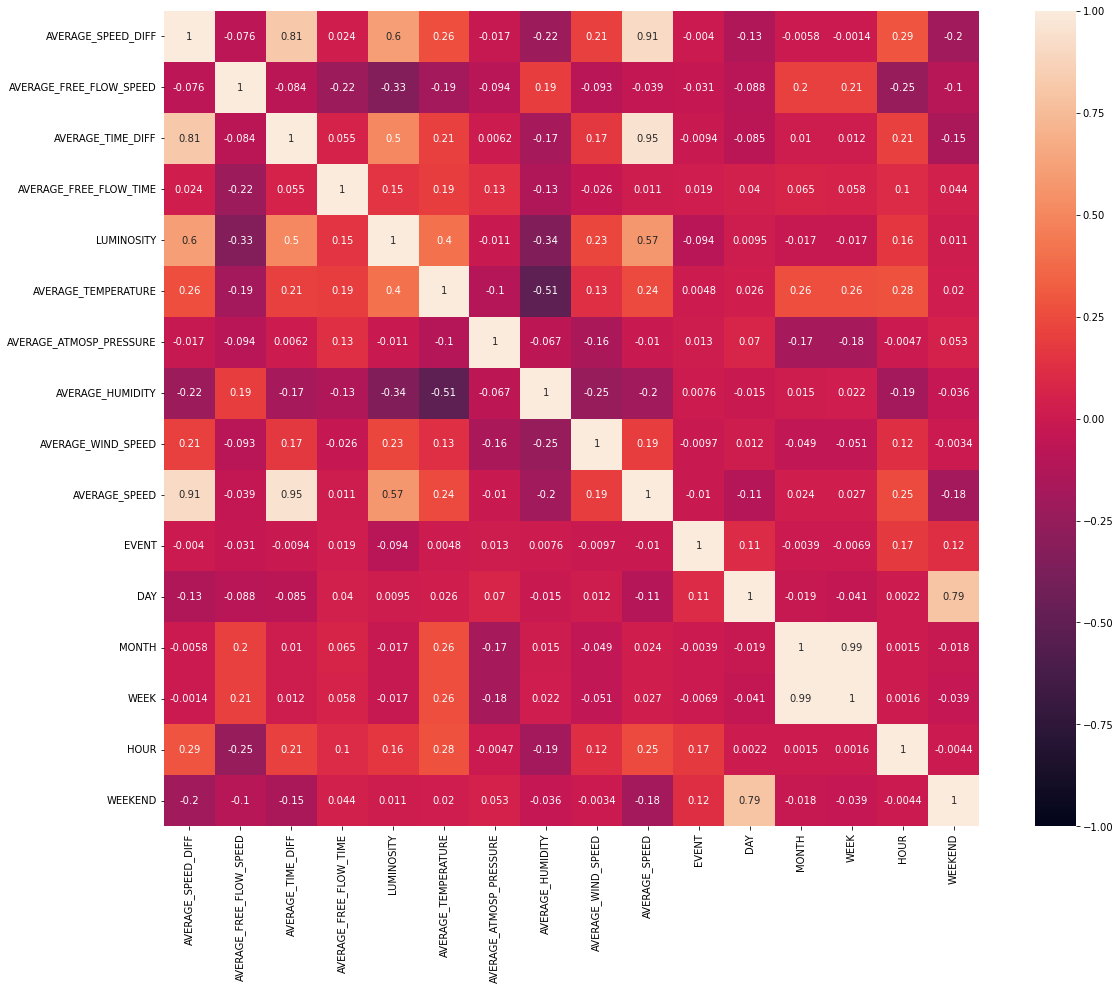

In [82]:
plt.figure(figsize=(20,15))
sns.heatmap(df_training_features.corr(), vmin = -1, vmax = 1, square = True, annot = True)

In [83]:
df_training_features.shape

(6812, 16)

# $\textbf{Treino do modelo}$

{'bootstrap': True, 'max_depth': 94, 'max_features': 6, 'n_estimators': 560, 'random_state': 2021}
RandomForestClassifier(max_depth=94, max_features=6, n_estimators=560,
                       random_state=2021)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       465
           1       0.70      0.74      0.72       263
           2       0.81      0.78      0.79       324
           3       0.74      0.79      0.76       211
           4       0.95      0.78      0.86       100

    accuracy                           0.81      1363
   macro avg       0.82      0.80      0.81      1363
weighted avg       0.82      0.81      0.82      1363

0.814380 accuracy


/home/bruno/anaconda3/envs/env1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


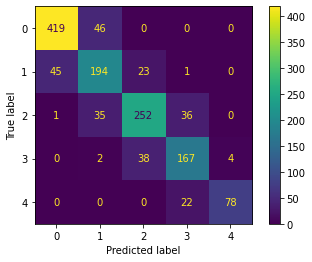

In [84]:
df_training_forest = df_training_features.copy()

df_training_forest =  df_training_forest.drop(['AVERAGE_TIME_DIFF'], axis = 1)

x = df_training_forest.drop(['AVERAGE_SPEED_DIFF'], axis = 1)
y = df_training_forest['AVERAGE_SPEED_DIFF'].to_frame()

param_grid = {
    'bootstrap': [True],
    'max_depth': [94],
    'max_features': [6],
    'n_estimators': [560],
    'random_state': [2021]
}

rf = RandomForestClassifier()

grid = HalvingGridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, factor = 2, refit = True, verbose = 0)

x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(y), test_size = 0.2, random_state = 2021)

grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

predictions = grid.predict(x_test)

print(classification_report(y_test, predictions))

print("%f accuracy" %(accuracy_score(y_test, predictions)))

plot_confusion_matrix(grid, x_test, y_test)

# $\textbf{Ficheiro de teste e submissão}$

In [85]:
df_test = pd.read_csv('../datasets/test_data.csv')

In [86]:
for index, values in df_test.iterrows():

    df_test.loc[df_test.index[index], 'AVERAGE_SPEED'] = values['AVERAGE_FREE_FLOW_SPEED'] - values['AVERAGE_FREE_FLOW_SPEED'] * values['AVERAGE_FREE_FLOW_TIME'] / (values['AVERAGE_FREE_FLOW_TIME'] + values['AVERAGE_TIME_DIFF'])

In [87]:
with open('EncontrosDesportivos.txt', 'r') as f:
    aux = f.readlines()
    datas = []
    
    for data in aux:
        pair = re.split(r' ', re.sub(r'\n', '', data))
        datas.append((pair[0], pair[1]))

    for index, values in df_test.iterrows():
        aux = values['record_date'].split()
        
        if (aux[0], aux[1]) in datas:
            df_test.loc[df_test.index[index], 'EVENT'] = 1
        else:
            df_test.loc[df_test.index[index], 'EVENT'] = 0

In [88]:
df_test['LUMINOSITY'] = df_test['LUMINOSITY'].apply(convertLuminosity)

df_test['record_date'] = pd.to_datetime(df_test['record_date'])
df_test['DAY'] = df_test.record_date.dt.weekday
df_test['MONTH'] = df_test.record_date.dt.month
df_test['WEEK'] = df_test.record_date.dt.isocalendar().week
df_test['HOUR'] = df_test.record_date.dt.hour
df_test = df_test.drop(['record_date'], axis = 1)

df_test['WEEKEND'] = df_test['DAY'].apply(weekend)

df_test = df_test.drop(['city_name', 'AVERAGE_CLOUDINESS', 'AVERAGE_RAIN', 'AVERAGE_PRECIPITATION', 'AVERAGE_TIME_DIFF'], axis = 1)

In [89]:
df_test.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_SPEED,EVENT,DAY,MONTH,WEEK,HOUR,WEEKEND
count,1500.0000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,40.8304,81.194333,0.996667,16.104000,1017.457333,80.734000,3.116667,7.687202e+00,0.016667,2.984000,7.105333,29.250000,11.211333,0.284000
std,4.2396,8.189691,0.985209,5.094293,5.840455,17.729358,2.198699,7.588403e+00,0.128062,1.994257,2.979512,12.768981,6.909305,0.451087
min,31.0000,48.100000,0.000000,1.000000,985.000000,14.000000,0.000000,-7.105427e-15,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,37.5000,75.800000,0.000000,13.000000,1015.000000,72.000000,1.000000,1.264817e+00,0.000000,1.000000,5.000000,20.000000,5.000000,0.000000
50%,41.0000,82.300000,1.000000,16.000000,1018.000000,86.000000,3.000000,5.260241e+00,0.000000,3.000000,8.000000,32.000000,11.000000,0.000000
75%,43.9000,87.600000,2.000000,19.000000,1021.000000,93.000000,4.000000,1.232665e+01,0.000000,5.000000,9.000000,39.000000,17.000000,1.000000
max,56.2000,106.100000,2.000000,32.000000,1033.000000,100.000000,13.000000,3.363346e+01,1.000000,6.000000,12.000000,50.000000,23.000000,1.000000


In [90]:
df_test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_SPEED,EVENT,DAY,MONTH,WEEK,HOUR,WEEKEND
0,39.2,91.0,0,8.0,1026.0,71.0,1.0,0.000000,0.0,2,2,7,23,0
1,42.5,76.8,0,11.0,1020.0,93.0,4.0,5.825843,1.0,2,11,48,20,0
2,45.9,86.3,0,14.0,1017.0,93.0,0.0,0.000000,0.0,1,8,33,5,0
3,33.2,89.9,2,22.0,1016.0,77.0,4.0,12.121751,0.0,5,7,27,17,1
4,44.0,85.5,0,12.0,1004.0,100.0,9.0,1.730337,0.0,0,10,42,6,0


In [91]:
df_training_submission = df_training_features.copy()

df_training_submission =  df_training_submission.drop(['AVERAGE_TIME_DIFF'], axis = 1)

x = df_training_submission.drop(['AVERAGE_SPEED_DIFF'], axis = 1)
y = df_training_submission['AVERAGE_SPEED_DIFF'].to_frame()

param_grid = {
    'bootstrap': [True],
    'max_depth': [94],
    'max_features': [6],
    'n_estimators': [560],
    'random_state': [2021]
}

rf = RandomForestClassifier()

grid = HalvingGridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, factor = 2, refit = True, verbose = 0)

grid.fit(x, np.ravel(y))

print(grid.best_params_)
print(grid.best_estimator_)

predictions = grid.predict(df_test)

{'bootstrap': True, 'max_depth': 94, 'max_features': 6, 'n_estimators': 560, 'random_state': 2021}
RandomForestClassifier(max_depth=94, max_features=6, n_estimators=560,
                       random_state=2021)


In [92]:
with open('../datasets/submission.csv', 'w') as file:
    i = 1
    file.write('RowId,Speed_Diff\n')

    for elem in predictions:
        if elem == 0:
            token = 'None'
        elif elem == 1:
            token = 'Low'
        elif elem == 2:
            token = 'Medium'
        elif elem == 3:
            token = 'High'
        else:
            token = 'Very_High' 
        file.write(str(i) + ',' + token + '\n')
        i += 1
print('Submission file ready!')

Submission file ready!


# $\textbf{Anexo - Outras tentativas de modelos}$

### $\textbf{SVC}$

In [123]:
df_training_svc = df_training_features.copy()

df_training_svc =  df_training_svc.drop(['AVERAGE_TIME_DIFF'], axis = 1)

x = df_training_svc.drop(['AVERAGE_SPEED_DIFF'], axis = 1)
y = df_training_svc['AVERAGE_SPEED_DIFF'].to_frame()

param_grid = [
        {'C': [10000], 'gamma': [0.00001], 'kernel': ['rbf']},
]

x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(y), test_size = 0.2, random_state = 2021)

grid = HalvingGridSearchCV(SVC(random_state = 2021), param_grid = param_grid, factor = 2, n_jobs = -1, refit = True, verbose = 0)

grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_estimator_)

predictions = grid.predict(x_test)

print(classification_report(y_test, predictions))

print("%f accuracy" %(accuracy_score(y_test, predictions)))

{'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}
SVC(C=10000, gamma=1e-05, random_state=2021)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       465
           1       0.67      0.70      0.68       263
           2       0.78      0.73      0.75       324
           3       0.73      0.76      0.75       211
           4       0.89      0.80      0.84       100

    accuracy                           0.80      1363
   macro avg       0.79      0.78      0.79      1363
weighted avg       0.80      0.80      0.80      1363

0.796038 accuracy


### $\textbf{XGBRFC}$

In [ ]:
df_training_xgb = df_training_features.copy()

df_training_xgb =  df_training_xgb.drop(['AVERAGE_TIME_DIFF', 'WEEK'], axis = 1)

x = df_training_xgb.drop(['AVERAGE_SPEED_DIFF'], axis = 1)
y = df_training_xgb['AVERAGE_SPEED_DIFF'].to_frame()

xgb_model = XGBRFClassifier(use_label_encoder = False, booster = "gbtree", objective = "multi:softmax", num_class = 5, eval_metric = "mlogloss")

parameters = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'learning_rate': np.arange(0.0001, 0.1, 0.0005),
    'colsample_bylevel': np.arange(0.1, 1.0, 0.01),
}

grid = RandomizedSearchCV(xgb_model, parameters, n_iter = 1, n_jobs = -1, cv = 3, verbose = 0, refit = True)

x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(y), test_size = 0.2, random_state = 2021)

grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

predictions = grid.predict(x_test)

print(classification_report(y_test, predictions))

print("%f accuracy" %(accuracy_score(y_test, predictions)))

plot_confusion_matrix(grid, x_test, y_test)

### $\textbf{Rede Neuronal}$

In [101]:
df_training_neuronal = df_training_features.copy()

df_training_neuronal =  df_training_neuronal.drop(['AVERAGE_TIME_DIFF'], axis = 1)

x = df_training_neuronal.drop(['AVERAGE_SPEED_DIFF'], axis = 1)
y = df_training_neuronal['AVERAGE_SPEED_DIFF'].to_frame()

scaler = MinMaxScaler(feature_range=(0, 1))

x = df_training_neuronal.drop('AVERAGE_SPEED_DIFF', axis=1)

x_scaled = x.copy()
x_scaled = scaler.fit_transform(x_scaled)
x_scaled = pd.DataFrame(x_scaled)

dummy_y = tf.keras.utils.to_categorical(y)

In [102]:
def build_model(init, dropout, dense_nparams, learning_rate):
    model = Sequential()
    model.add(Dense(dense_nparams, activation = 'relu', kernel_initializer = init, input_dim = 14)) 
    model.add(Dropout(dropout))
    model.add(Dense(dense_nparams, kernel_initializer = init, activation = 'relu'))
    model.add(Dense(5, kernel_initializer = init, activation = 'softmax'))

    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = tf.optimizers.Adam(learning_rate = learning_rate),
        metrics = ['accuracy']
    )
    
    return model

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, dummy_y, test_size = 0.2, random_state = 2021)

param_grid = {
    'dense_nparams': [512],
    'dropout': [0],
    'init': ['normal'],
    'learning_rate': [0.001]
}

clf = KerasClassifier(build_fn = build_model, epochs = 20, batch_size = 20, verbose = 0)

grid_search = HalvingGridSearchCV(clf, param_grid, cv = 3, factor = 2, refit = True, n_jobs = -1)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
y_test_ = np.argmax(y_test, axis = 1)

print(grid_search.best_params_)
print(confusion_matrix(y_test_, predictions))
print(classification_report(y_test_, predictions))
print("%f accuracy" %(accuracy_score(y_test_, predictions)))

2022-01-01 22:14:29.419382: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-01 22:14:29.457399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-01 22:14:29.496647: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

{'dense_nparams': 512, 'dropout': 0, 'init': 'normal', 'learning_rate': 0.001}
[[408  57   0   0   0]
 [ 42 195  24   2   0]
 [  1  37 231  55   0]
 [  0   2  26 168  15]
 [  0   0   0  10  90]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       465
           1       0.67      0.74      0.70       263
           2       0.82      0.71      0.76       324
           3       0.71      0.80      0.75       211
           4       0.86      0.90      0.88       100

    accuracy                           0.80      1363
   macro avg       0.79      0.81      0.80      1363
weighted avg       0.81      0.80      0.80      1363

0.801174 accuracy


/home/bruno/anaconda3/envs/env1/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
